# **StatMLfromScratch: Statistical Models from Scratch on Iris Dataset**

## **Project Overview**

**StatMLfromScratch** is a machine learning project focused on building, evaluating, and deploying statistical models entirely **from scratch** without using scikit-learn’s built-in classifiers.  
The workflow includes **data visualization and exploration**, **data preprocessing (standardization)**, implementation of **four core statistical models**, evaluation using **custom-built metrics**, and deployment of the chosen model via a **Streamlit web application**.

## **Objective**

Develop and deploy machine learning models built from first principles to classify flower species in the **Iris dataset**, showcasing a full pipeline of exploratory analysis, model building, evaluation, and deployment.

## **Dataset**

- **Source**: [Iris Dataset (UCI Repository)](https://archive.ics.uci.edu/ml/datasets/iris)  
- **Samples**: 150  
- **Features**: 4 numerical features (sepal length, sepal width, petal length, petal width)  
- **Target**: 3 flower species (Setosa, Versicolor, Virginica)

## **Data Exploration & Preprocessing**

- Conducted **exploratory data analysis (EDA)** including visualizations of class distributions and feature relationships.  
- Applied **standardization** to features to improve convergence of models.  

## **Modeling & Evaluation**

Implemented and trained the following models **from scratch**:

- **Logistic Regression (OvR)**  
- **Linear SVM (OvR)**  
- **Polynomial Kernel SVM (OvR)**  
- **RBF Kernel SVM (OvR)**  

To handle the multiclass classification problem, the **One-vs-Rest (OvR)** approach was applied.  

For evaluation, all metrics were also implemented **from scratch**, including:  
- **Accuracy**  
- **Precision**  
- **Recall**  
- **F1-score**  
- **Confusion Matrix**  
- **Classification Report**  

**Performance Results** (chosen model):  
- **RBF Kernel SVM (OvR)** achieved:  
  - **Accuracy** = `0.9667`  
  - **Precision** = `0.9697`  
  - **Recall** = `0.9667`  
  - **F1-score** = `0.9666`  

Both the **Polynomial Kernel SVM** and **RBF Kernel SVM** reached the same top performance, but the **RBF Kernel SVM** was selected for deployment due to its robust performance across varying decision boundaries.

## **Deployment**

A **[Streamlit web app](https://statmlfromscratch-9rwvc4skrejihrbf4xcmem.streamlit.app/)** was developed, allowing users to input flower measurements and receive real-time predictions of species (Setosa, Versicolor, Virginica).  

This project demonstrates the **end-to-end implementation of statistical models from scratch**, including preprocessing, multiclass classification using OvR, evaluation metrics, and deployment.

Watch a short demo of the app here: [View on LinkedIn](https://www.linkedin.com/posts/rawan-alwadeya-17948a305_machinelearning-fromscratch-svm-activity-7363676141431246849-UxQv?utm_source=share&utm_medium=member_desktop&rcm=ACoAAE3YzG0BAZw48kimDDr_guvq8zXgSjDgk_I)

#### **Import Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, classification_report, confusion_matrix
import joblib
import warnings
warnings.filterwarnings('ignore')

#### **Dataset Loading**

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

In [3]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
X.shape

(150, 4)

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### **Data Exploration and Visualization**

In [6]:
df = pd.DataFrame(X, columns= ['sepal_length','sepal_width','petal_length','petal_width'])
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
df['species'] = y
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
47,4.6,3.2,1.4,0.2,0
35,5.0,3.2,1.2,0.2,0
39,5.1,3.4,1.5,0.2,0
123,6.3,2.7,4.9,1.8,2
126,6.2,2.8,4.8,1.8,2
102,7.1,3.0,5.9,2.1,2
108,6.7,2.5,5.8,1.8,2
72,6.3,2.5,4.9,1.5,1
50,7.0,3.2,4.7,1.4,1
53,5.5,2.3,4.0,1.3,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
df.duplicated().sum()

1

In [12]:
df = df.drop_duplicates()

In [13]:
df.skew()

sepal_length    0.312826
sepal_width     0.307149
petal_length   -0.263101
petal_width    -0.090076
species         0.012434
dtype: float64

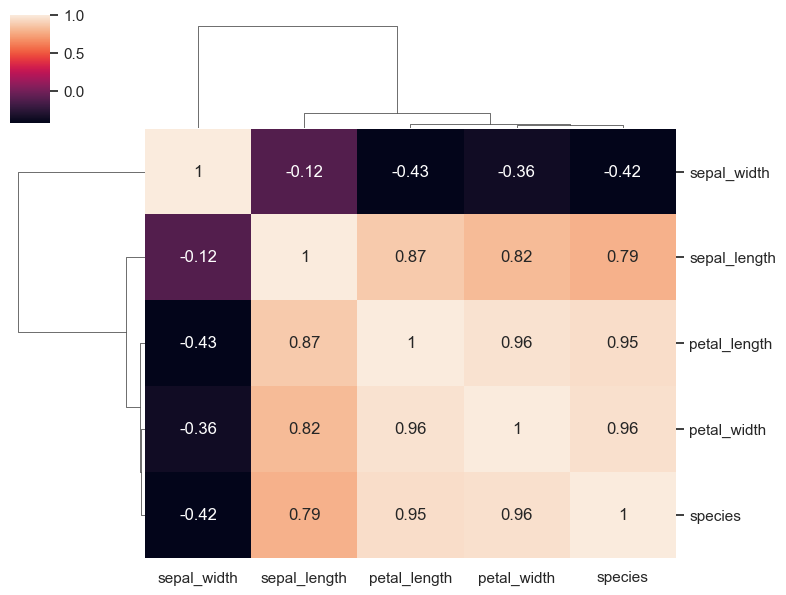

In [14]:
sns.clustermap(df.corr(), annot=True, figsize=(8, 6))
plt.show()

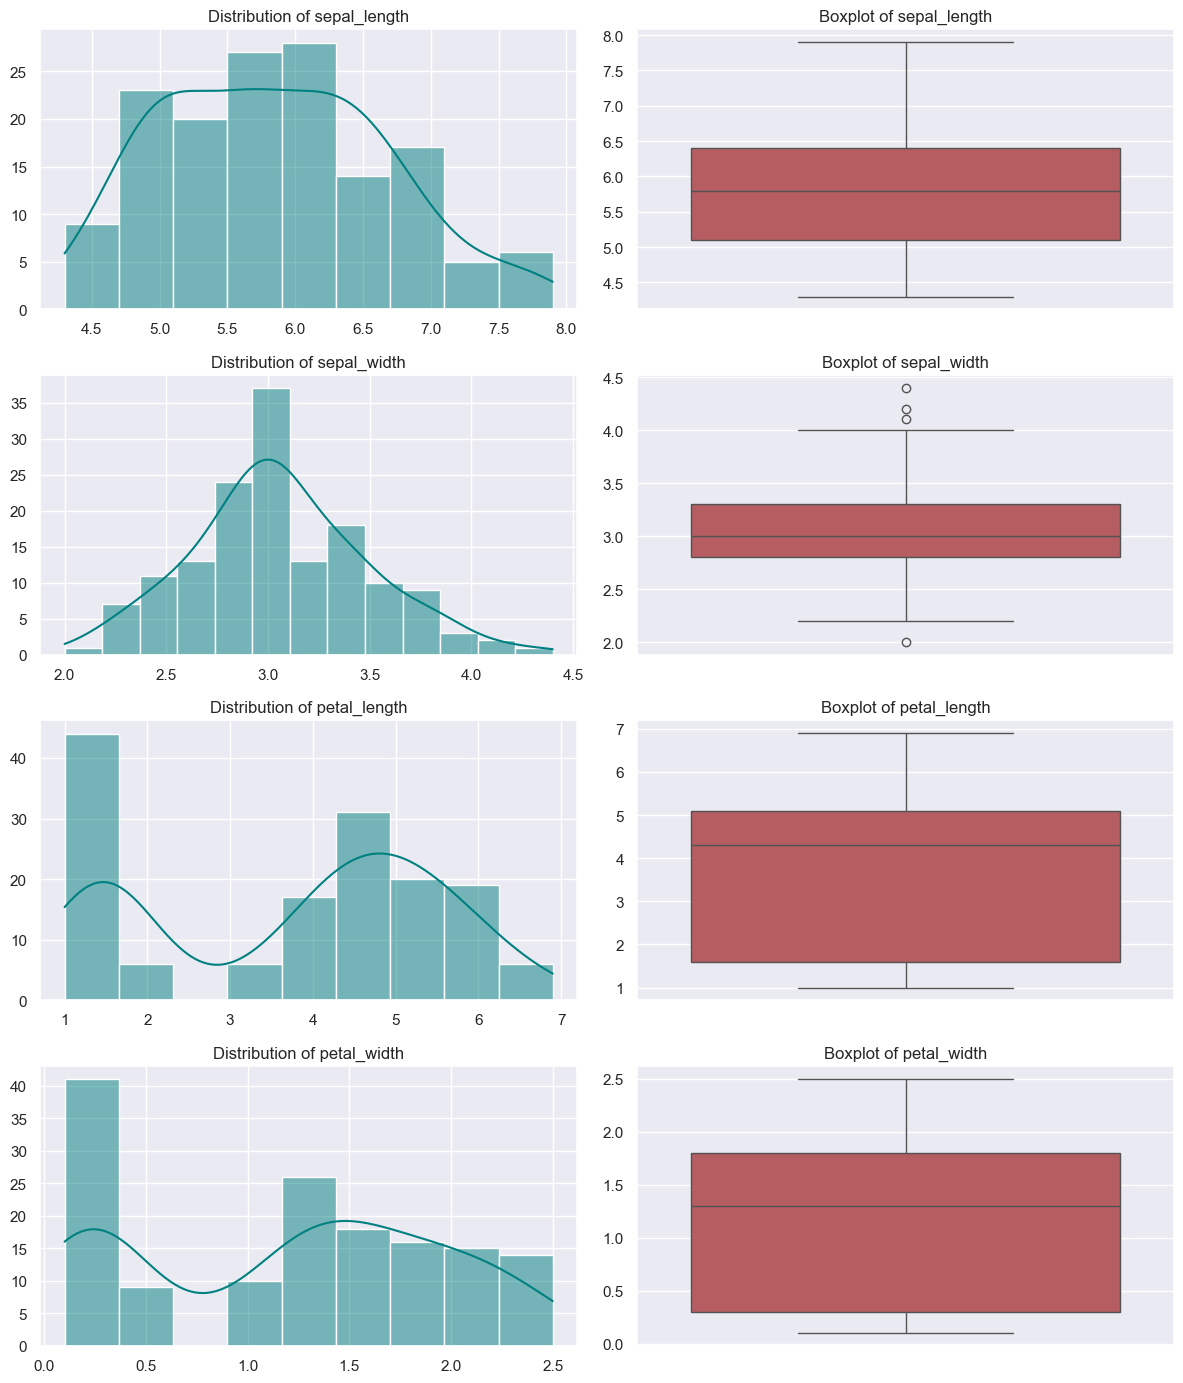

In [15]:
features = ['sepal_length','sepal_width','petal_length','petal_width']

plt.figure(figsize=(12, len(features) * 3.5))

for i, col in enumerate(features):
    plt.subplot(len(features), 2, i * 2 + 1)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f"Distribution of {col}")
    plt.xlabel('')  
    plt.ylabel('')

    plt.subplot(len(features), 2, i * 2 + 2)
    sns.boxplot(y=df[col], color='r')
    plt.title(f"Boxplot of {col}")
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

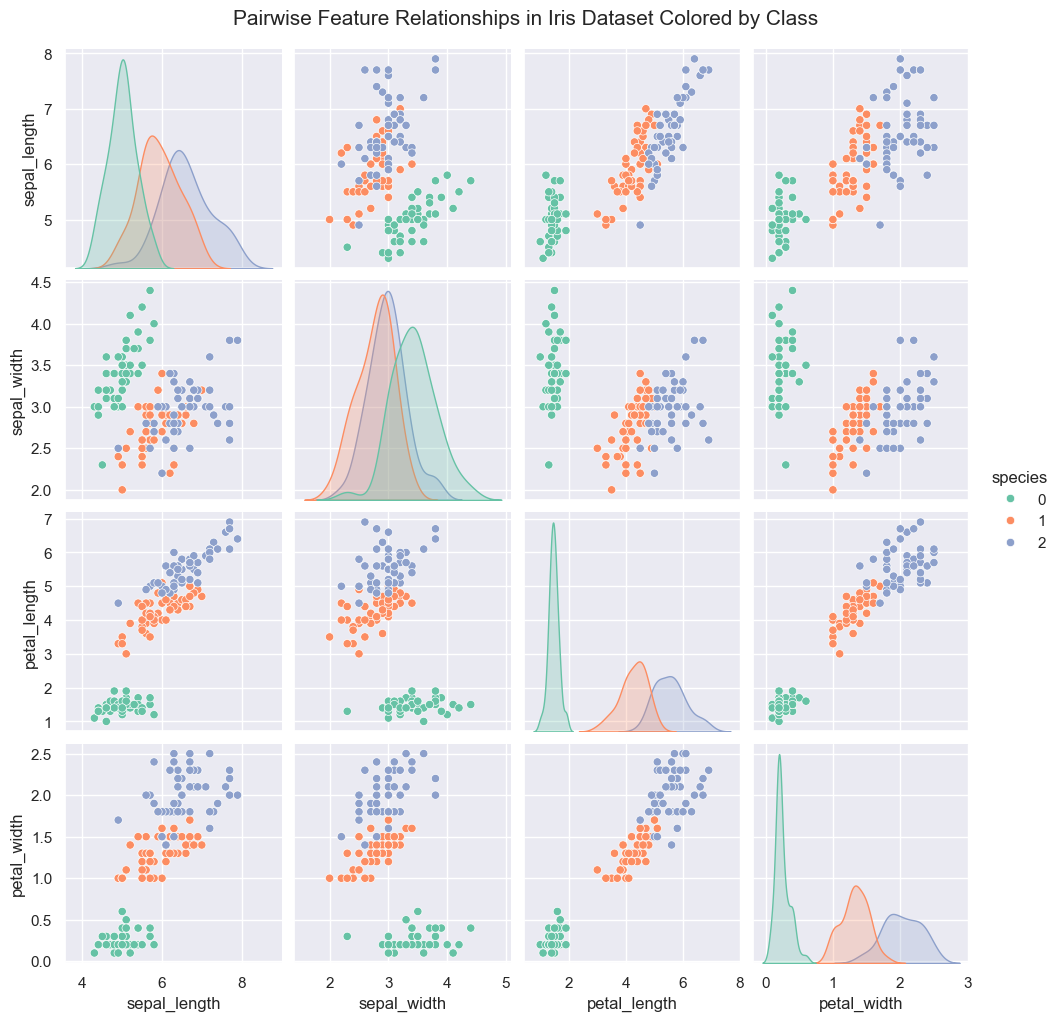

In [16]:
sns.pairplot(df,hue='species',palette='Set2')
plt.suptitle('Pairwise Feature Relationships in Iris Dataset Colored by Class', y=1.02, fontsize=15)
plt.show()

In [17]:
df['species'].value_counts()

species
0    50
1    50
2    49
Name: count, dtype: int64

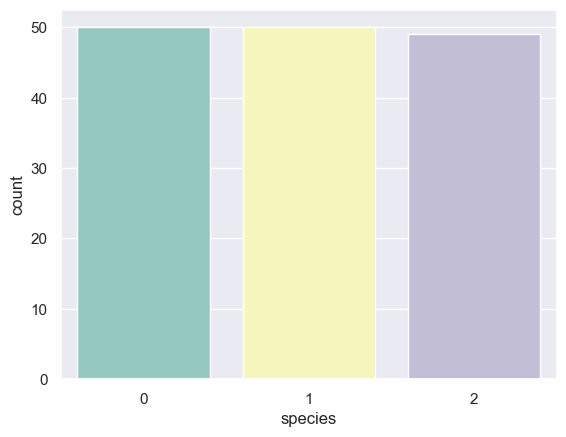

In [18]:
sns.countplot(data = df, x='species', palette='Set3')
plt.show()

### **Data Preprocessing**

#### **Splitting Data into Training and Testing Sets**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
print('X_train shape is: ', X_train.shape)
print('X_test shape is: ', X_test.shape)
print('y_train shape is: ', y_train.shape)
print('y_test shape is: ', y_test.shape)

X_train shape is:  (120, 4)
X_test shape is:  (30, 4)
y_train shape is:  (120,)
y_test shape is:  (30,)


#### **Feature Scaling using StandardScaler**

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [22]:
X_train

array([[-1.72156775, -0.33210111, -1.34572231, -1.32327558],
       [-1.12449223, -1.22765467,  0.41450518,  0.6517626 ],
       [ 1.14439475, -0.5559895 ,  0.58484978,  0.25675496],
       [-1.12449223,  0.11567567, -1.28894078, -1.45494479],
       [-0.40800161, -1.22765467,  0.13059752,  0.12508575],
       [ 0.54731923, -1.22765467,  0.69841284,  0.91510102],
       [-0.2885865 , -0.77987789,  0.24416059,  0.12508575],
       [ 0.54731923, -0.5559895 ,  0.75519438,  0.38842418],
       [ 2.21913069, -0.10821272,  1.3230097 ,  1.44177787],
       [ 2.21913069,  1.6828944 ,  1.66369889,  1.31010866],
       [ 2.09971558, -0.10821272,  1.60691736,  1.17843945],
       [ 0.18907392, -0.33210111,  0.41450518,  0.38842418],
       [-1.00507713, -2.34709662, -0.15331014, -0.26992188],
       [-0.04975629, -0.77987789,  0.18737906, -0.26992188],
       [-0.04975629, -1.00376628,  0.13059752, -0.00658346],
       [-1.36332244,  0.33956406, -1.23215924, -1.32327558],
       [-0.88566202,  1.

In [23]:
X_test = scaler.transform(X_test)

In [24]:
X_test

array([[-1.72156775, -0.10821272, -1.40250384, -1.32327558],
       [ 0.30848902, -0.10821272,  0.64163131,  0.78343181],
       [-1.12449223, -1.45154306, -0.2668732 , -0.26992188],
       [-1.00507713, -1.67543145, -0.2668732 , -0.26992188],
       [-1.72156775,  0.33956406, -1.40250384, -1.32327558],
       [ 0.54731923,  0.56345245,  0.52806825,  0.52009339],
       [-1.48273754,  1.23511762, -1.57284844, -1.32327558],
       [-0.52741671,  0.78734084, -1.17537771, -1.32327558],
       [ 0.78614944, -0.10821272,  0.81197591,  1.04677024],
       [-0.52741671, -0.10821272,  0.41450518,  0.38842418],
       [ 1.74147027, -0.33210111,  1.43657276,  0.78343181],
       [ 1.26380985,  0.11567567,  0.75519438,  1.44177787],
       [ 0.78614944, -0.10821272,  1.1526651 ,  1.31010866],
       [ 0.66673433,  0.33956406,  0.41450518,  0.38842418],
       [-1.00507713,  0.78734084, -1.28894078, -1.32327558],
       [-1.00507713,  0.56345245, -1.34572231, -1.32327558],
       [-0.04975629,  2.

### **Statistical ML Models from Scratch**

#### **Logistic Regression from Scratch**

In [25]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.1, epochs=1000):
        self.lr, self.epochs = lr, epochs
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.epochs):
            linear = np.dot(X, self.w) + self.b
            y_pred = self.sigmoid(linear)
            
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.w) + self.b)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

class LogisticRegressionOVR:
    def __init__(self, **kwargs):
        self.models = {}
        self.kwargs = kwargs
    
    def fit(self, X, y):
        self.classes = np.unique(y)
        for cls in self.classes:
            y_binary = np.where(y == cls, 1, 0)
            logreg = LogisticRegressionScratch(**self.kwargs)
            logreg.fit(X, y_binary)
            self.models[cls] = logreg

    def predict(self, X):
        probs = np.array([m.predict_proba(X) for m in self.models.values()])
        return np.argmax(probs, axis=0)

#### **Linear SVM from Scratch**

In [26]:
class LinearSVM: 
    def __init__(self, C=1.0, lr=0.001, n_iter=1000):  
        self.C = C                                     
        self.lr = lr                                 
        self.n_iter = n_iter 
        self.w = None
        self.b = 0

    def fit(self, X, y):
        m, n = X.shape
        y = np.where(y == 1, 1, -1)
        self.w = np.zeros(n)

        for _ in range(self.n_iter):
            margin = y * (X @ self.w + self.b)
            idx = margin < 1 
            dw = -2 * self.w + self.C * np.dot(X[idx].T, y[idx])  
            db = self.C * np.sum(y[idx]) 
            self.w += self.lr * dw  
            self.b += self.lr * db

    def decision_function(self, X):
        return X @ self.w + self.b

    def predict(self, X):
        return (self.decision_function(X) >= 0).astype(int) 


class LinearSVM_OVR:
    def __init__(self, C=1.0, lr=0.001, n_iter=1000):
        self.models = []
        self.classes_ = []
        self.C = C
        self.lr = lr
        self.n_iter = n_iter

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        for cls in self.classes_:
            y_binary = np.where(y == cls, 1, -1)
            model = LinearSVM(C=self.C, lr=self.lr, n_iter=self.n_iter)
            model.fit(X, y_binary)
            self.models.append(model)

    def predict(self, X):
        decision_scores = np.array([model.decision_function(X) for model in self.models])
        return self.classes_[np.argmax(decision_scores, axis=0)]

#### **Polynomial Kernel SVM from scratch**

In [27]:
class PolySVM:
    def __init__(self, C=1.0, degree=3, coef0=1, lr=0.001, n_iter=1000):
        self.C = C
        self.degree = degree
        self.coef0 = coef0
        self.lr = lr
        self.n_iter = n_iter
        self.alpha = None
        self.X = None
        self.y = None
        self.b = 0

    def poly_kernel(self, X1, X2):
        return (np.dot(X1, X2.T) + self.coef0) ** self.degree

    def fit(self, X, y):
        m, n = X.shape
        y = np.where(y == 1, 1, -1)   # binary labels
        self.X = X
        self.y = y
        self.alpha = np.zeros(m)

        K = self.poly_kernel(X, X)

        for _ in range(self.n_iter):
            for i in range(m):
                margin = np.sum(self.alpha * self.y * K[:, i]) + self.b
                if self.y[i] * margin < 1:
                    self.alpha[i] += self.lr * (1 - self.y[i] * margin)
                    self.alpha[i] = min(max(self.alpha[i], 0), self.C)  # clip
                    self.b += self.lr * self.y[i]

    def decision_function(self, X):
        K = self.poly_kernel(X, self.X)
        return np.dot(K, self.alpha * self.y) + self.b

    def predict(self, X):
        return np.sign(self.decision_function(X))



class PolySVM_OVR:
    def __init__(self, C=1.0, degree=3, coef0=1, lr=0.001, n_iter=1000):
        self.models = []
        self.classes_ = []
        self.C = C
        self.degree = degree
        self.coef0 = coef0
        self.lr = lr
        self.n_iter = n_iter

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        for cls in self.classes_:
            y_binary = np.where(y == cls, 1, -1)
            model = PolySVM(C=self.C, degree=self.degree, coef0=self.coef0, lr=self.lr, n_iter=self.n_iter)
            model.fit(X, y_binary)
            self.models.append(model)

    def predict(self, X):
        decision_scores = np.array([model.decision_function(X) for model in self.models])
        return self.classes_[np.argmax(decision_scores, axis=0)]

#### **RBF Kernel SVM from scratch**

In [28]:
class RBFSVM:
    def __init__(self, C=1.0, gamma=0.5, lr=0.001, n_iter=1000):
        self.C = C
        self.gamma = gamma
        self.lr = lr
        self.n_iter = n_iter
        self.alpha = None
        self.X = None
        self.y = None
        self.b = 0

    def rbf_kernel(self, X1, X2):
        sq_dists = np.sum(X1**2, axis=1)[:, None] + np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
        return np.exp(-self.gamma * sq_dists)

    def fit(self, X, y):
        m, n = X.shape
        y = np.where(y == 1, 1, -1)   
        self.X = X
        self.y = y
        self.alpha = np.zeros(m)

        K = self.rbf_kernel(X, X)

        for _ in range(self.n_iter):
            for i in range(m):
                margin = np.sum(self.alpha * self.y * K[:, i]) + self.b
                if self.y[i] * margin < 1:
                    self.alpha[i] += self.lr * (1 - self.y[i] * margin)
                    self.alpha[i] = min(max(self.alpha[i], 0), self.C)  
                    self.b += self.lr * self.y[i]

    def decision_function(self, X):
        K = self.rbf_kernel(X, self.X)
        return np.dot(K, self.alpha * self.y) + self.b

    def predict(self, X):
        return np.sign(self.decision_function(X))


class RBFSVM_OVR:
    def __init__(self, C=1.0, gamma=0.5, lr=0.001, n_iter=1000):
        self.models = []
        self.classes_ = []
        self.C = C
        self.gamma = gamma
        self.lr = lr
        self.n_iter = n_iter

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        for cls in self.classes_:
            y_binary = np.where(y == cls, 1, -1)
            model = RBFSVM(C=self.C, gamma=self.gamma, lr=self.lr, n_iter=self.n_iter)
            model.fit(X, y_binary)
            self.models.append(model)

    def predict(self, X):
        decision_scores = np.array([model.decision_function(X) for model in self.models])
        return self.classes_[np.argmax(decision_scores, axis=0)]

#### **Evaluation Metrics from Scratch**

In [29]:
def confusion_matrix(y_true, y_pred):
    classes = np.unique(np.concatenate([y_true, y_pred]))
    matrix = np.zeros((len(classes), len(classes)), dtype=int)
    for true, pred in zip(y_true, y_pred):
        matrix[true][pred] += 1
    return matrix, classes


def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)


def precision_recall_f1(cm):
    n_classes = cm.shape[0]
    precision = []
    recall = []
    f1 = []

    for i in range(n_classes):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP

        prec = TP / (TP + FP) if (TP + FP) > 0 else 0
        rec  = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1_i = 2 * prec * rec / (prec + rec) if (prec + rec) > 0 else 0

        precision.append(prec)
        recall.append(rec)
        f1.append(f1_i)

    return precision, recall, f1


def classification_report(y_true, y_pred):
    cm, classes = confusion_matrix(y_true, y_pred)

    report = "Class | Precision | Recall | F1-score | Support\n"
    report += "-"*50 + "\n"

    precisions, recalls, f1s, supports = [], [], [], []

    for i, cls in enumerate(classes):
        tp = cm[i, i]
        fp = cm[:, i].sum() - tp
        fn = cm[i, :].sum() - tp

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0
        support = cm[i, :].sum()

        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
        supports.append(support)

        report += f"{cls:5d} | {precision:9.2f} | {recall:6.2f} | {f1:8.2f} | {support:7d}\n"

    report += "-"*50 + "\n"
    report += f"Macro Avg | {np.mean(precisions):9.2f} | {np.mean(recalls):6.2f} | {np.mean(f1s):8.2f} | {np.sum(supports):7d}\n"

    return report

In [30]:
model_names = []
accuracy_result = []
precision_result = []
recall_result = []
f1_result = []


def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm, classes = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec, rec, f1 = precision_recall_f1(cm)

    model_names.append(name)
    accuracy_result.append(acc)
    precision_result.append(np.mean(prec))
    recall_result.append(np.mean(rec))
    f1_result.append(np.mean(f1))

    print(f"----- {name} -----")
    print("Accuracy:", acc)
    print("Precision:", np.mean(prec))
    print("Recall:", np.mean(rec))
    print("F1-score:", np.mean(f1))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    print("\nConfusion Matrix:\n", cm)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

#### **Training and Evaluating Models**

----- Logistic Regression (OvR) -----
Accuracy: 0.8666666666666667
Precision: 0.875
Recall: 0.8666666666666667
F1-score: 0.8653198653198654

Classification Report:
 Class | Precision | Recall | F1-score | Support
--------------------------------------------------
    0 |      1.00 |   1.00 |     1.00 |      10
    1 |      0.88 |   0.70 |     0.78 |      10
    2 |      0.75 |   0.90 |     0.82 |      10
--------------------------------------------------
Macro Avg |      0.88 |   0.87 |     0.87 |      30


Confusion Matrix:
 [[10  0  0]
 [ 0  7  3]
 [ 0  1  9]]


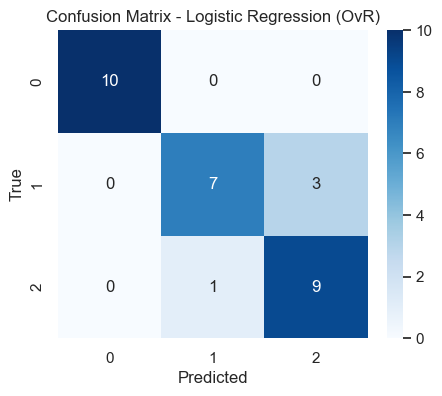

----- Linear SVM (OvR) -----
Accuracy: 0.8333333333333334
Precision: 0.8498168498168498
Recall: 0.8333333333333334
F1-score: 0.8294970161977835

Classification Report:
 Class | Precision | Recall | F1-score | Support
--------------------------------------------------
    0 |      1.00 |   1.00 |     1.00 |      10
    1 |      0.86 |   0.60 |     0.71 |      10
    2 |      0.69 |   0.90 |     0.78 |      10
--------------------------------------------------
Macro Avg |      0.85 |   0.83 |     0.83 |      30


Confusion Matrix:
 [[10  0  0]
 [ 0  6  4]
 [ 0  1  9]]


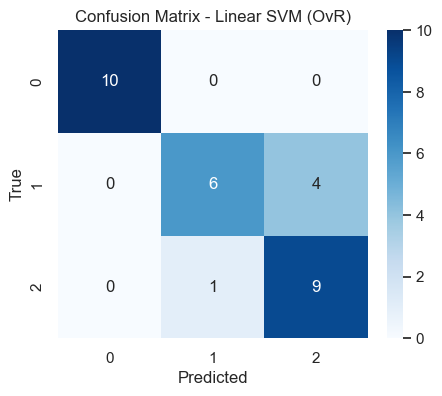

----- Polynomial Kernel SVM (OvR) -----
Accuracy: 0.9666666666666667
Precision: 0.9696969696969697
Recall: 0.9666666666666667
F1-score: 0.9665831244778613

Classification Report:
 Class | Precision | Recall | F1-score | Support
--------------------------------------------------
    0 |      1.00 |   1.00 |     1.00 |      10
    1 |      1.00 |   0.90 |     0.95 |      10
    2 |      0.91 |   1.00 |     0.95 |      10
--------------------------------------------------
Macro Avg |      0.97 |   0.97 |     0.97 |      30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


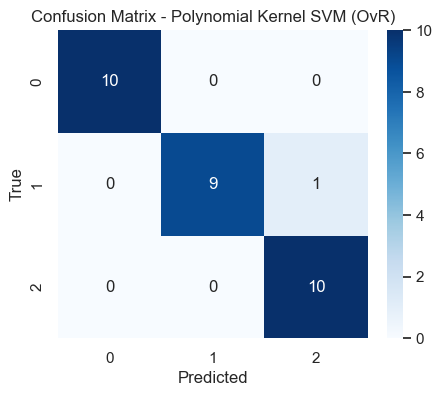

----- RBF Kernel SVM (OvR) -----
Accuracy: 0.9666666666666667
Precision: 0.9696969696969697
Recall: 0.9666666666666667
F1-score: 0.9665831244778613

Classification Report:
 Class | Precision | Recall | F1-score | Support
--------------------------------------------------
    0 |      1.00 |   1.00 |     1.00 |      10
    1 |      1.00 |   0.90 |     0.95 |      10
    2 |      0.91 |   1.00 |     0.95 |      10
--------------------------------------------------
Macro Avg |      0.97 |   0.97 |     0.97 |      30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


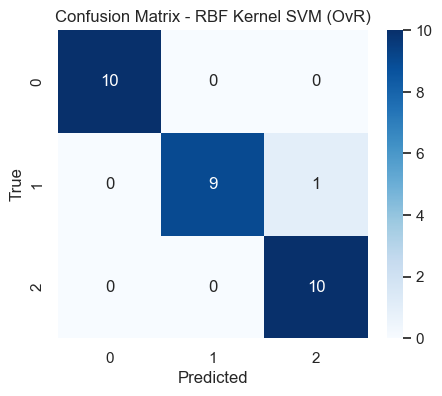

In [31]:
models = {
    "Logistic Regression (OvR)": LogisticRegressionOVR(),
    "Linear SVM (OvR)": LinearSVM_OVR(),
    "Polynomial Kernel SVM (OvR)": PolySVM_OVR(C=1.0, degree=3, coef0=1, lr=0.001, n_iter=500),
    "RBF Kernel SVM (OvR)": RBFSVM_OVR(C=1.0, gamma=0.5, lr=0.001, n_iter=500),
}

for name, model in models.items():
    evaluate_model(name, model, X_train, X_test, y_train, y_test)

#### **Model Performance Summary and Visualization**

In [32]:
df_results = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_result,
    'Precision': precision_result,
    'Recall': recall_result,
    'F1 Score': f1_result
})

df_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (OvR),0.866667,0.875000,0.866667,0.865320
1,Linear SVM (OvR),0.833333,0.849817,0.833333,0.829497
2,Polynomial Kernel SVM (OvR),0.966667,0.969697,0.966667,0.966583
3,RBF Kernel SVM (OvR),0.966667,0.969697,0.966667,0.966583


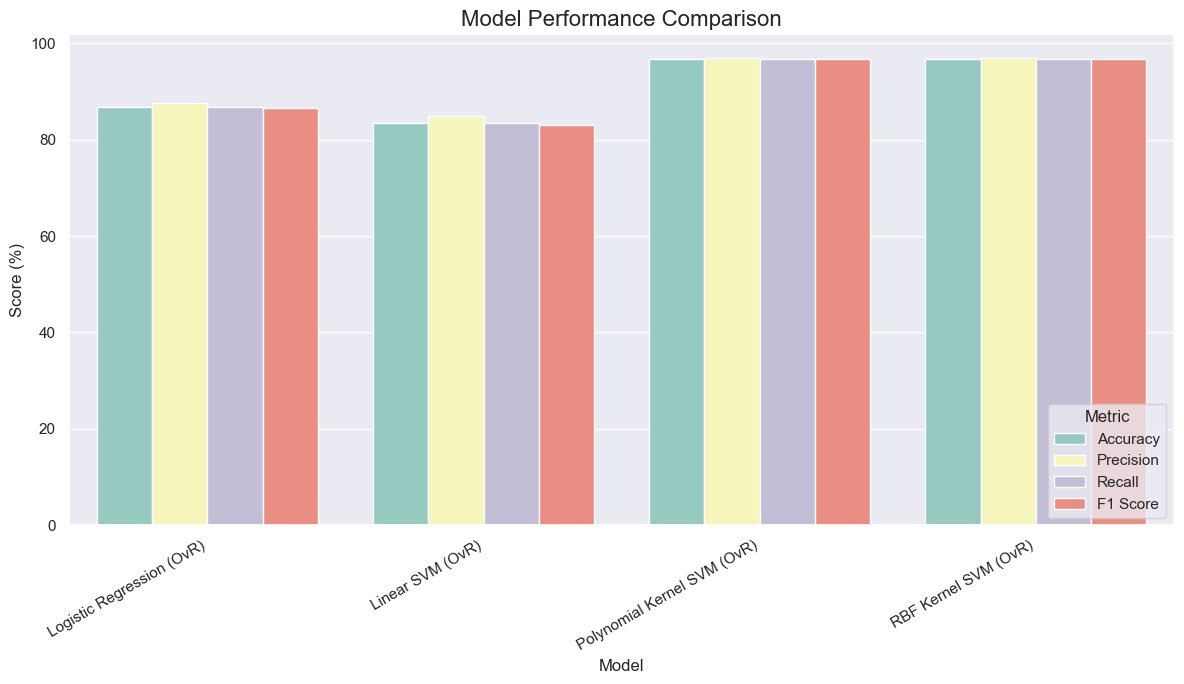

In [33]:
df_result = pd.DataFrame({
    'Model': df_results['Model'],
    'Accuracy': df_results['Accuracy'],
    'Precision': df_results['Precision'],
    'Recall': df_results['Recall'],
    'F1 Score': df_results['F1 Score']
})

df_result[['Accuracy', 'Precision', 'Recall', 'F1 Score']] *= 100

df_melted = df_result.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 7))
sns.set_style('darkgrid')
palette = sns.color_palette("Set3")

ax = sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette=palette)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Model')
plt.ylabel('Score (%)')
plt.legend(title='Metric',loc='lower right')
plt.tight_layout()
plt.show()

#### **Choosing RBF Kernal as the Final Model**

In [34]:
RBF_SVM_model = models['RBF Kernel SVM (OvR)']

#### **Export Model and Preprocessing Pipeline**

In [35]:
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(RBF_SVM_model, 'RBF_SVM_model.pkl')

['RBF_SVM_model.pkl']

## **Final Thoughts**

This project showcased the full process of building, evaluating, and deploying statistical machine learning models **from scratch** on the Iris dataset.  
By implementing **Logistic Regression**, **Linear SVM**, **Polynomial Kernel SVM**, and **RBF Kernel SVM** without relying on external machine learning libraries, the project highlights the inner workings of classification algorithms and the **One-vs-Rest (OvR)** strategy for handling multiclass problems.  

All evaluation metrics—**accuracy, precision, recall, F1-score, confusion matrix, and classification report**—were also coded from scratch, ensuring a deeper understanding of how model performance is quantified.  
Among the models, both **Polynomial SVM** and **RBF SVM** achieved the highest results, with **RBF SVM** ultimately chosen for deployment due to its strong decision boundary generalization.  

The deployment of the model as a **Streamlit web application** makes the solution interactive and accessible, allowing real-time predictions of flower species based on user-provided measurements.  

---

**Thank you for exploring this project.**